In [266]:
# Titanic Dataset available in Kaggle

In [267]:
import pandas as pd
from pandas import Series, DataFrame
import os


In [268]:
os.chdir('C:\\Users\\sri\\Desktop\\learning\\python')

In [396]:
os.getcwd()

'C:\\Users\\sri\\Desktop\\learning\\python'

In [270]:
titanic_df = pd.read_csv('train.csv')

In [271]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [272]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


Some basic questions:
    1. Who were the passengers on the ship? (Age, Gender, Class)
    2. What desck were the passengers on and how is it related to the class? 
    3. Where did the passengers come from?
    4. Who was alone and who was with family?
    5. What factors helped someone survive the sinking?
    

In [273]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [274]:
sns.set_style("white")

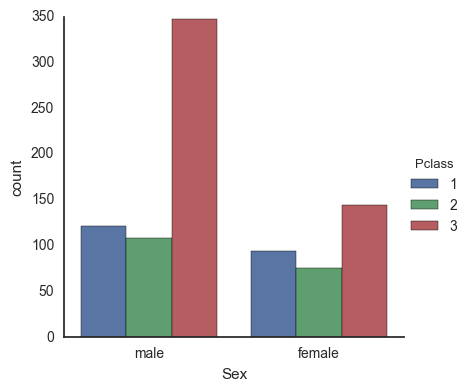

In [275]:
# 1. Who were the passengers on the ship?
sns.factorplot('Sex',data=titanic_df, kind="count", hue='Pclass')

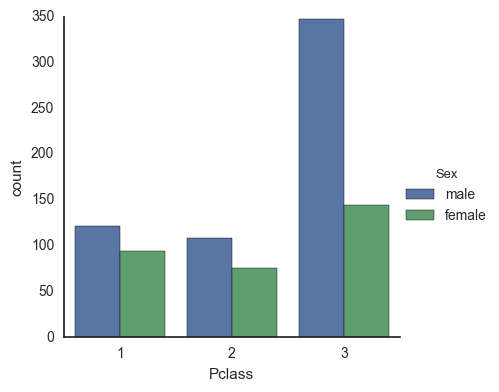

In [276]:
sns.factorplot('Pclass',data=titanic_df, kind="count", hue='Sex')

In [277]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age<16:
        return 'child'
    
    else:
        return sex

In [278]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [279]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


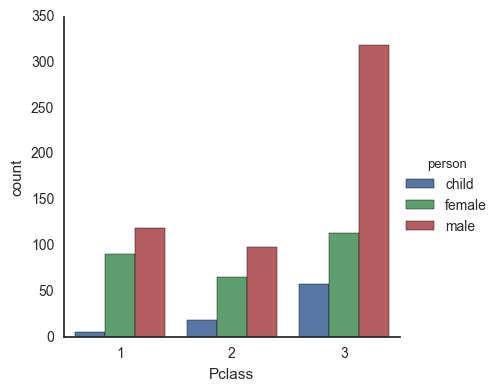

In [280]:
sns.factorplot('Pclass',data=titanic_df, kind="count", hue='person', hue_order=['child','female','male'] )

In [281]:
titanic_df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

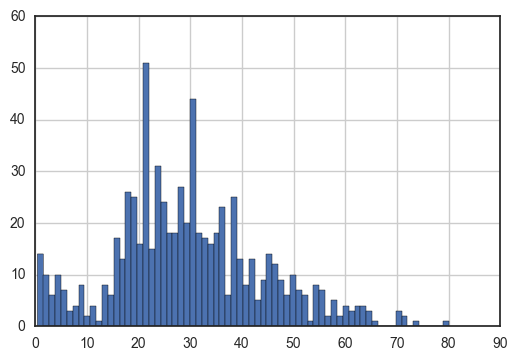

In [282]:
titanic_df['Age'].hist(bins=70)

In [283]:
titanic_df['Age'].mean()

29.69911764705882

In [284]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [285]:
import warnings 

In [286]:
warnings.filterwarnings('ignore')

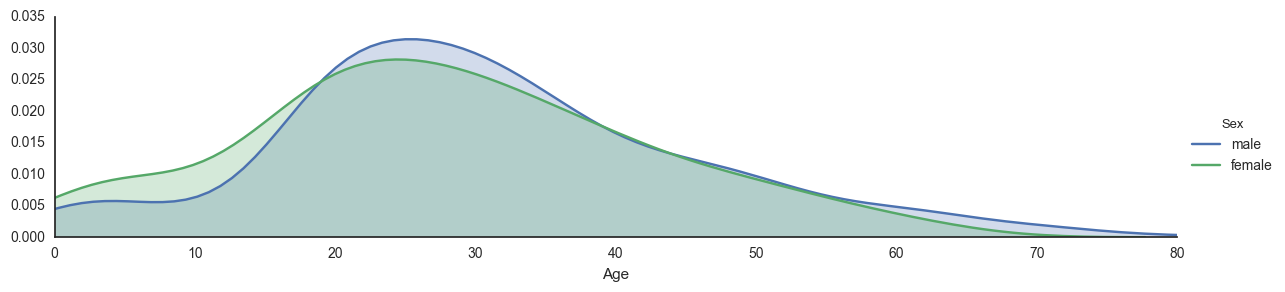

In [287]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)

fig.map(sns.kdeplot,'Age', shade=True)

fig.set(xlim=(0,titanic_df['Age'].max()))

fig.add_legend()

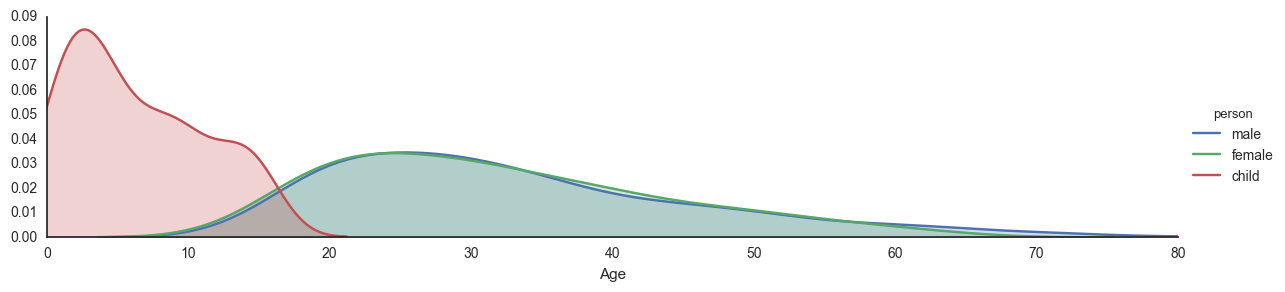

In [288]:
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)

fig.map(sns.kdeplot,'Age', shade=True)

fig.set(xlim=(0,titanic_df['Age'].max()))

fig.add_legend()

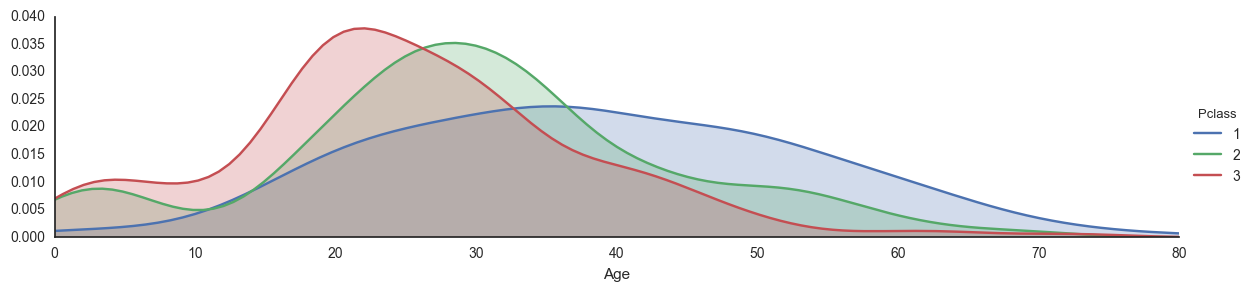

In [289]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)

fig.map(sns.kdeplot,'Age', shade=True)

fig.set(xlim=(0,titanic_df['Age'].max()))

fig.add_legend()

In [290]:
# Question 2

In [291]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [292]:
deck = titanic_df['Cabin'].dropna()

In [293]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [294]:
levels =[]

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels, columns=['Cabin'])

cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


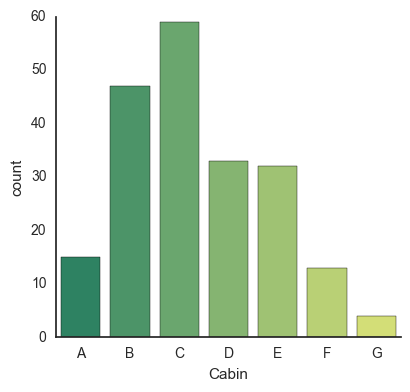

In [295]:
sns.factorplot('Cabin',data=cabin_df, palette='summer',kind="count", x_order=['A','B','C','D','E','F','G'])

In [296]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


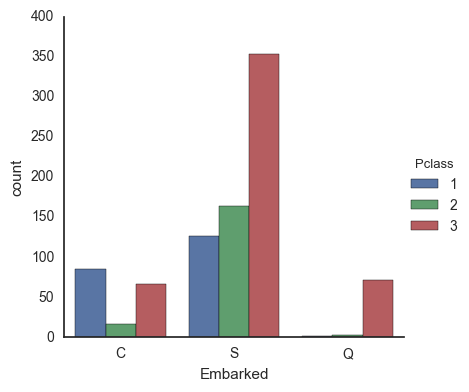

In [297]:
sns.factorplot('Embarked', data=titanic_df, hue='Pclass',kind='count', x_order=['C', 'S','Q'])

In [298]:
#Question 3 : Who was alone and who was with family?

In [299]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [300]:
titanic_df['alone'] = titanic_df.SibSp + titanic_df.Parch

In [301]:
titanic_df['alone'].loc[(titanic_df['alone'] > 0)] = 'With family'

titanic_df['alone'].loc[(titanic_df['alone'] == 0)] = 'Without family'

In [302]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Without family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Without family
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Without family
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Without family
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With family


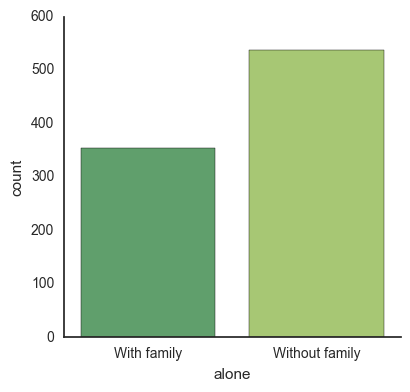

In [303]:
sns.factorplot('alone',data=titanic_df, palette='summer', kind='count')

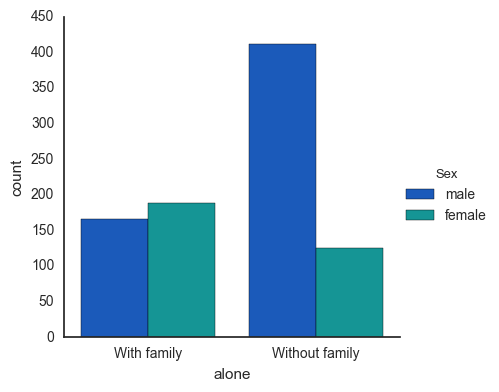

In [304]:
sns.factorplot('alone',data=titanic_df, palette='winter', kind='count', hue='Sex')

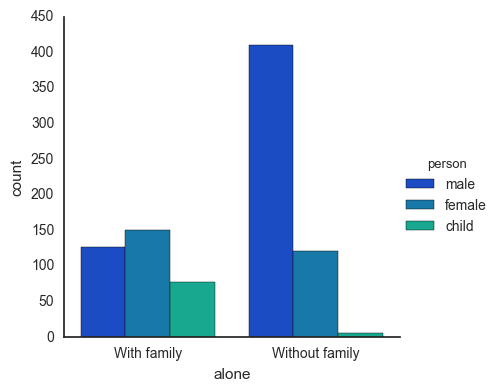

In [305]:
sns.factorplot('alone',data=titanic_df, palette='winter', kind='count', hue='person')

In [306]:
#Question 5: Factors affecting the survivors on the ship?

In [307]:
titanic_df['Survivor'] = titanic_df['Survived'].map({0:'No',1:'Yes'})

In [308]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Without family,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Without family,No


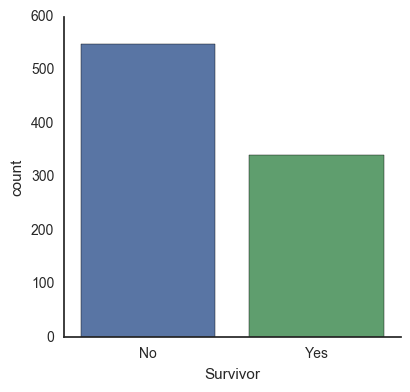

In [309]:
sns.factorplot('Survivor', data=titanic_df, kind='count')

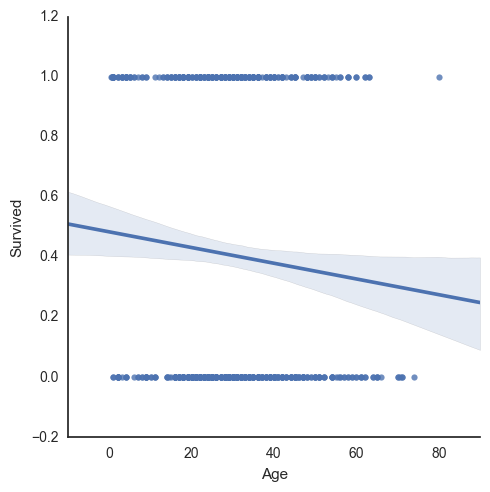

In [310]:
sns.lmplot(x='Age', y='Survived', data=titanic_df)

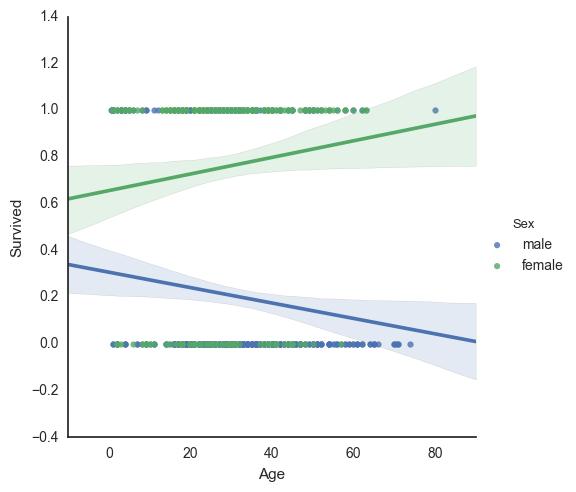

In [311]:
sns.lmplot(x='Age', y='Survived', data=titanic_df, hue='Sex')

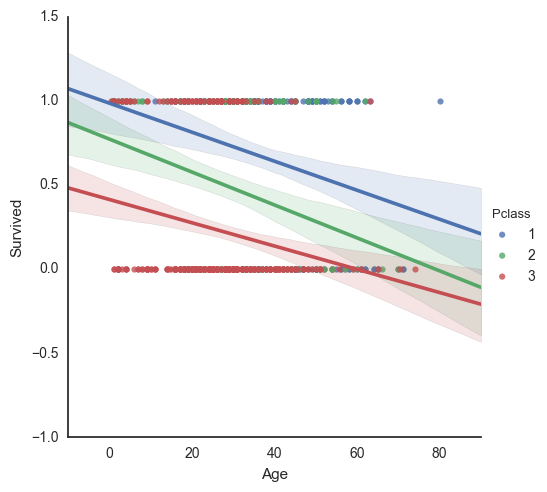

In [312]:
sns.lmplot(x='Age', y='Survived', data=titanic_df, hue='Pclass')

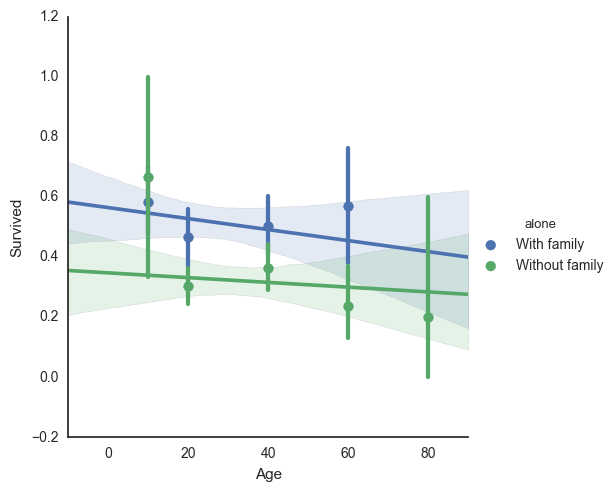

In [313]:
sns.lmplot(x='Age', y='Survived', data=titanic_df, hue='alone', x_bins=[10,20,40,60,80])

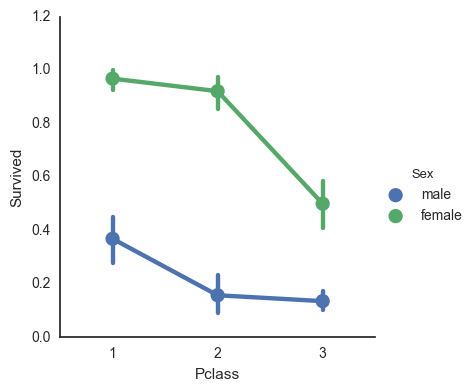

In [314]:
sns.factorplot(x='Pclass', y='Survived', data=titanic_df, hue='Sex')

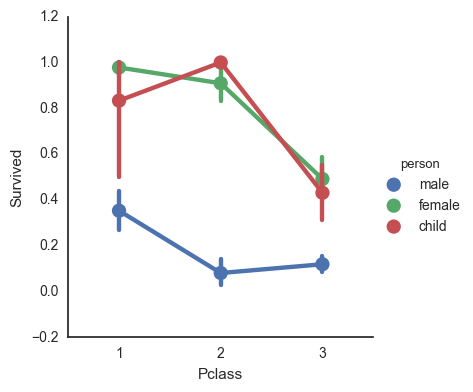

In [315]:
sns.factorplot(x='Pclass', y='Survived', data=titanic_df, hue='person')

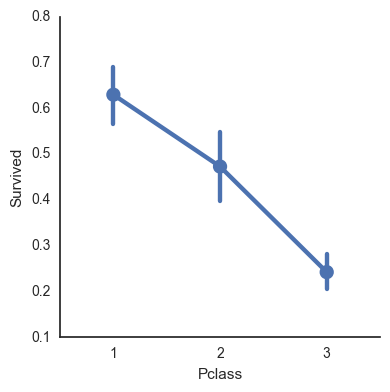

In [316]:
sns.factorplot(x='Pclass', y='Survived', data=titanic_df)

In [317]:
# Additional 2 questions:
# 1. Did the deck have an effect on the passengers survival rate? Did the answermatch up the intuition?
# 2. Did having a family member increase the odds of survival?

In [318]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [324]:
cabin_df1 = DataFrame(deck)

In [334]:
#cabin_df1['CL'] = cabin_df1['Cabin'].astype(str).str[0]

cabin_df1['Survivor'] = titanic_df.Survivor
    
cabin_df1.head()

,Cabin,CL,Survivor
1,C85,C,Yes
3,C123,C,Yes
6,E46,E,No
10,G6,G,Yes
11,C103,C,Yes


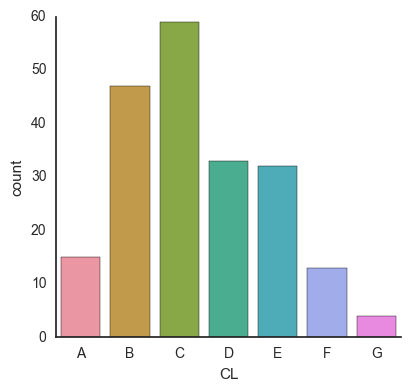

In [365]:
sns.factorplot('CL', data=cabin_df1, kind='count', order=['A','B','C','D','E','F','G'])

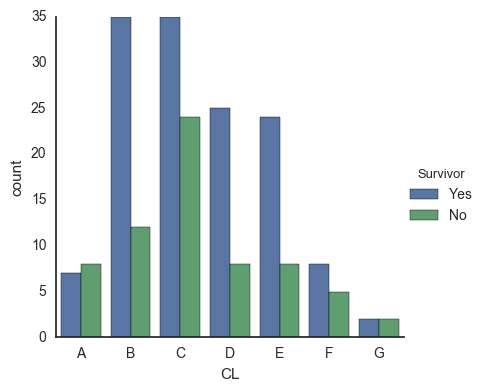

In [381]:
sns.factorplot('CL', data=cabin_df1, hue='Survivor', kind='count', order=['A','B','C','D','E','F','G'])

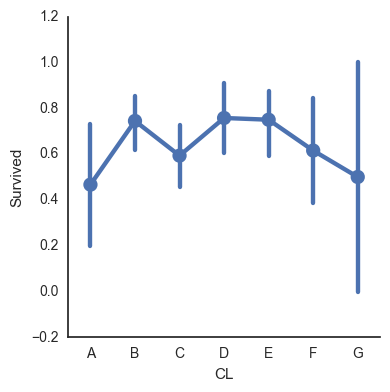

In [392]:
cabin_df1['Survived'] = titanic_df.Survived
sns.factorplot(y='Survived',x='CL', data=cabin_df1, order=['A','B','C','D','E','F','G'])

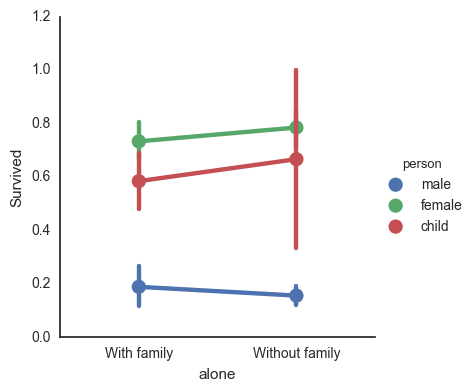

In [388]:
sns.factorplot(y='Survived',x='alone', data=titanic_df,hue='person')